# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore")

In [197]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [198]:
df.shape

(768, 9)

In [199]:
df[df['Outcome'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [200]:
df[df['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [201]:
# missing values?
df.isnull().sum()

#no NULL values in data set

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
#missing values are zeros rather than nulls. Will need to drop or choose an appropriate filler value
zero_count = (df == 0).sum()
zero_count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [203]:
#calculating quartiles for outlier detection
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

In [204]:
#remove 1.5*IQR for skinthickness
df = df[~((df['SkinThickness'] < (Q1 - 1.5 * IQR)) |(df['SkinThickness'] > (Q3 + 1.5 * IQR)))]
df['SkinThickness'].max()

63

In [205]:
#replace zeros in BMI with median
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [206]:
#check for outliers with IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
print(1.5*IQR + Q3)
print(df['BMI'].max())
print(Q1 - 1.5*IQR)
print(df['BMI'].min())

50.25
67.1
13.849999999999998
18.2


In [207]:
#remove rows with outliers for BMI
df = df[~((df['BMI'] < (Q1 - 1.5 * IQR)) |(df['BMI'] > (Q3 + 1.5 * IQR)))]

In [208]:
df.shape

(759, 9)

Recalculate the mean for Glucose, Bloodpressure, SkinThickness, BMI to find the mean with false zero values corrected. 

In [209]:
#
Glucose_corrected_mean = df.loc[df['Glucose'] > 0, ['Glucose']].sum()/(df.shape[0] - zero_count.Glucose)
SkinThickness_corrected_mean = df.loc[df['SkinThickness'] > 0, ['SkinThickness']].sum()/(df.shape[0] - zero_count.SkinThickness)
BloodPressure_corrected_mean = df.loc[df['BloodPressure'] > 0, ['BloodPressure']].sum()/(df.shape[0] - zero_count.BloodPressure)
BMI_corrected_mean = df.loc[df['BMI'] > 0, ['BMI']].sum()/(df.shape[0] - zero_count.BMI)
Insulin_corrected_mean = df.loc[df['Insulin'] > 0, ['Insulin']].sum()/(df.shape[0] - zero_count.Insulin)

#compare new means with original means to see if there are issues
print(Glucose_corrected_mean.iloc[0])
print(df['Glucose'].mean())
print(SkinThickness_corrected_mean.iloc[0])
print(df['SkinThickness'].mean())
print(BloodPressure_corrected_mean.iloc[0])
print(df['BloodPressure'].mean())
print(BMI_corrected_mean.iloc[0])
print(df['BMI'].mean())
print(Insulin_corrected_mean.iloc[0])
print(df['Insulin'].mean())

121.42307692307692
120.6231884057971
28.94360902255639
20.28722002635046
72.40469613259668
69.06587615283267
32.67125668449198
32.197760210803686
155.9038961038961
79.08168642951252


In [210]:
#define a function that fills zeroes with normally distributed values for a specific column

def fill_zeros(df, col, mean):
    std = df.loc[df[col] > 0, [col]].std()


    size = (df[col] == 0).sum()

    values = np.random.normal(mean, std, size)

    mask = df[col] == 0
    df.loc[mask, col] = values.astype(float)


    min_val = df[col].min()
    max_val = df[col].max()

    df.loc[mask, col] = np.clip(values, min_val, max_val)

    return df

In [211]:
#calc mean and std for insulin where outcome = 1
mean_insulin_outcome_1 = df[(df['Insulin'] != 0) & (df['Outcome'] == 1)]['Insulin'].mean()
std_insulin_outcome_1 = df[(df['Insulin'] != 0) & (df['Outcome'] == 1)]['Insulin'].std()

#calc mean and std for insulin where outcome = 0
mean_insulin_outcome_0 = df[(df['Insulin'] != 0) & (df['Outcome'] == 0)]['Insulin'].mean()
std_insulin_outcome_0 = df[(df['Insulin'] != 0) & (df['Outcome'] == 0)]['Insulin'].std()

In [212]:
#call fill zeros function for insulin for outcome = 1
df = fill_zeros(df, 'Insulin', mean_insulin_outcome_1)
#call fill zeros function for insulin for outcome = 0
df = fill_zeros(df, 'Insulin', mean_insulin_outcome_0)

#drop values of insulin where insulin <= 0
df = df[df['Insulin'] > 0]

In [213]:
#calculate IQR for insulin
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
#compare 1.5 * IQR + Q3 to max value
print(1.5*IQR + Q3)
print(df['Insulin'].max())

451.46695580292703
846.0


In [214]:
#drop rows where insulin outside of 1.5 * IQR + Q3
df = df[~(df['Insulin'] > (1.5*IQR + Q3))]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.861925,119.097629,68.877266,20.400279,167.245205,32.112552,0.466286,33.048815,0.331939
std,3.369542,31.231769,19.201853,15.437662,94.848625,6.446138,0.313447,11.573019,0.471238
min,0.000000,0.000000,0.000000,0.000000,0.212764,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,92.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,155.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,231.000000,36.100000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,449.904998,50.000000,2.288000,81.000000,1.000000


In [215]:
cols_norm = ['Glucose', 'SkinThickness', 'BloodPressure', 'BMI']
for col in cols_norm:
    df = fill_zeros(df, col, eval(col+'_corrected_mean.iloc[0]'))


Distribution of Each predictor variable along diagonal in pairplot. Can see some variables likely have false zero values. Glucose, blood pressure, skin thickness, BMI appear to be normally distributed (ignoring zeros). Pregnancies, age and diabetes pedigree function appear to be right skewed. Age not being normally distributed may imply that the dataset has a bias towards certain age groups. 

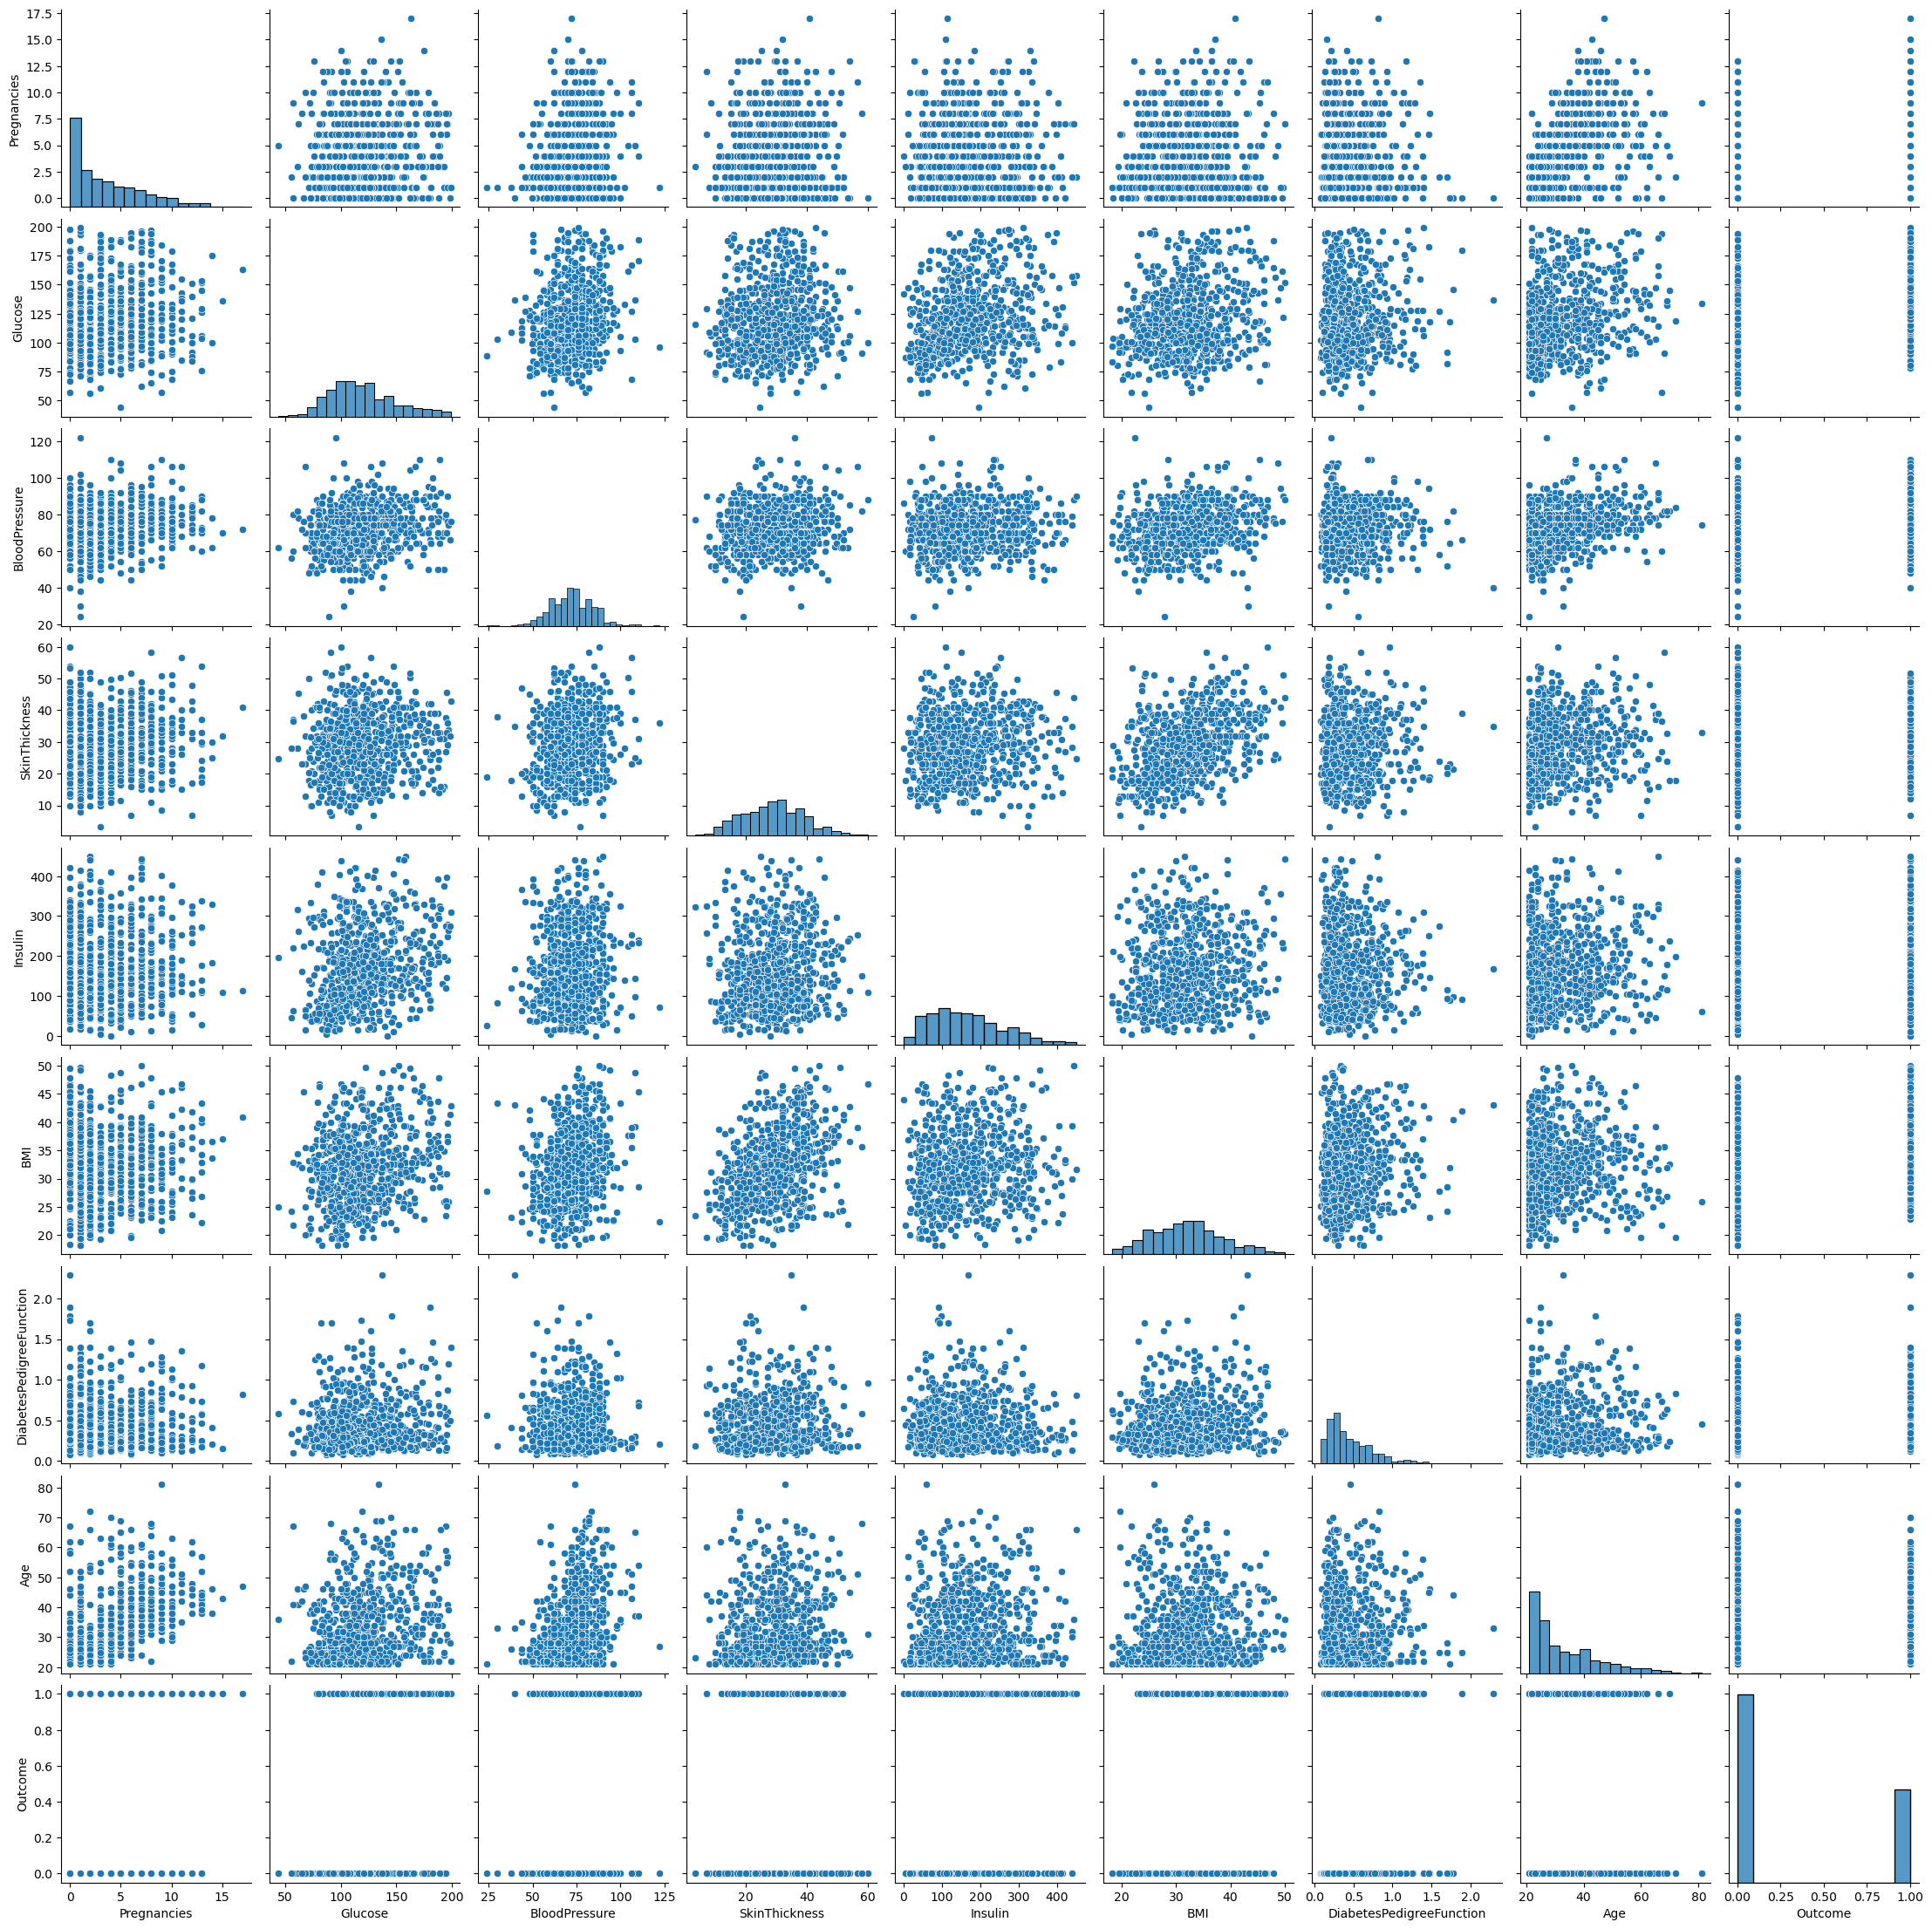

In [216]:
sns.pairplot(df)

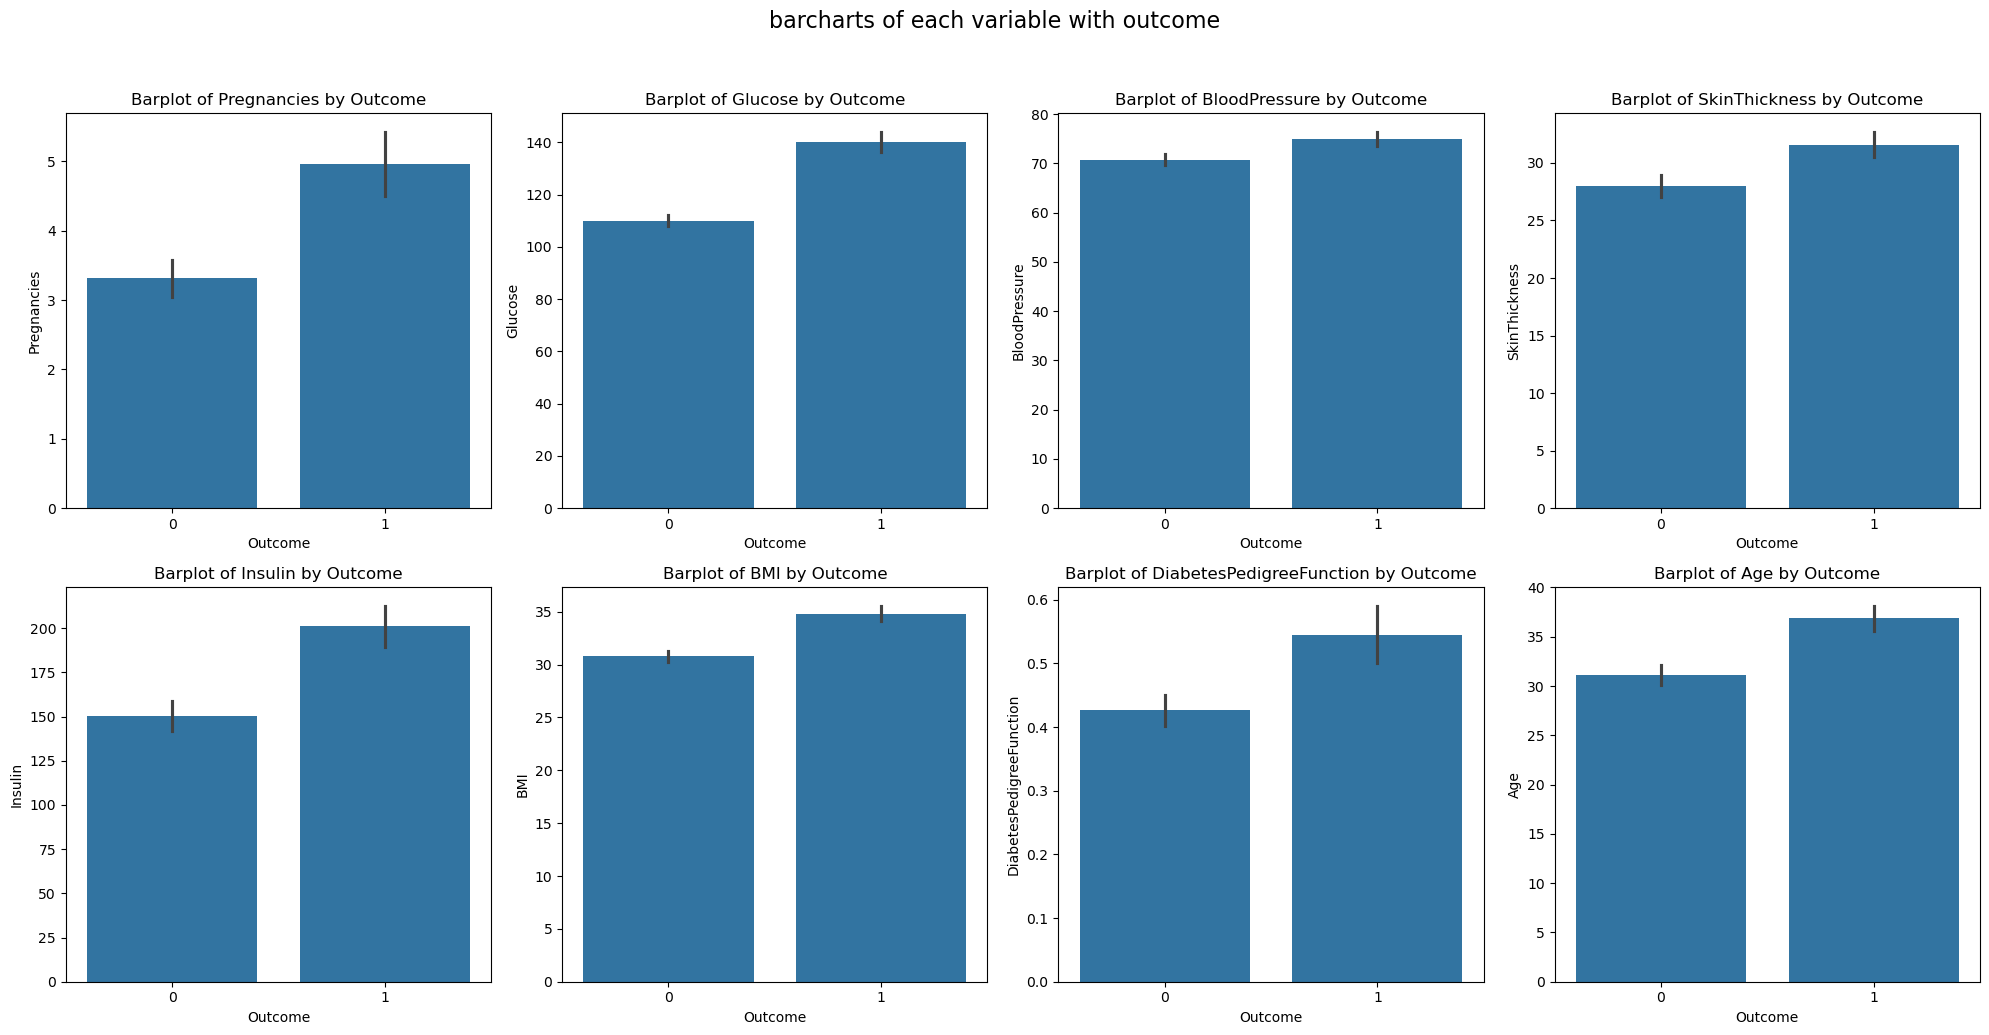

In [220]:
columns = df.columns.drop('Outcome')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

axes = axes.flatten()

fig.suptitle('barcharts of each variable with outcome', fontsize=16, y=1.03)

for i, column in enumerate(columns):
    sns.barplot(x='Outcome', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Barplot of {column} by Outcome')

plt.tight_layout()
plt.show()

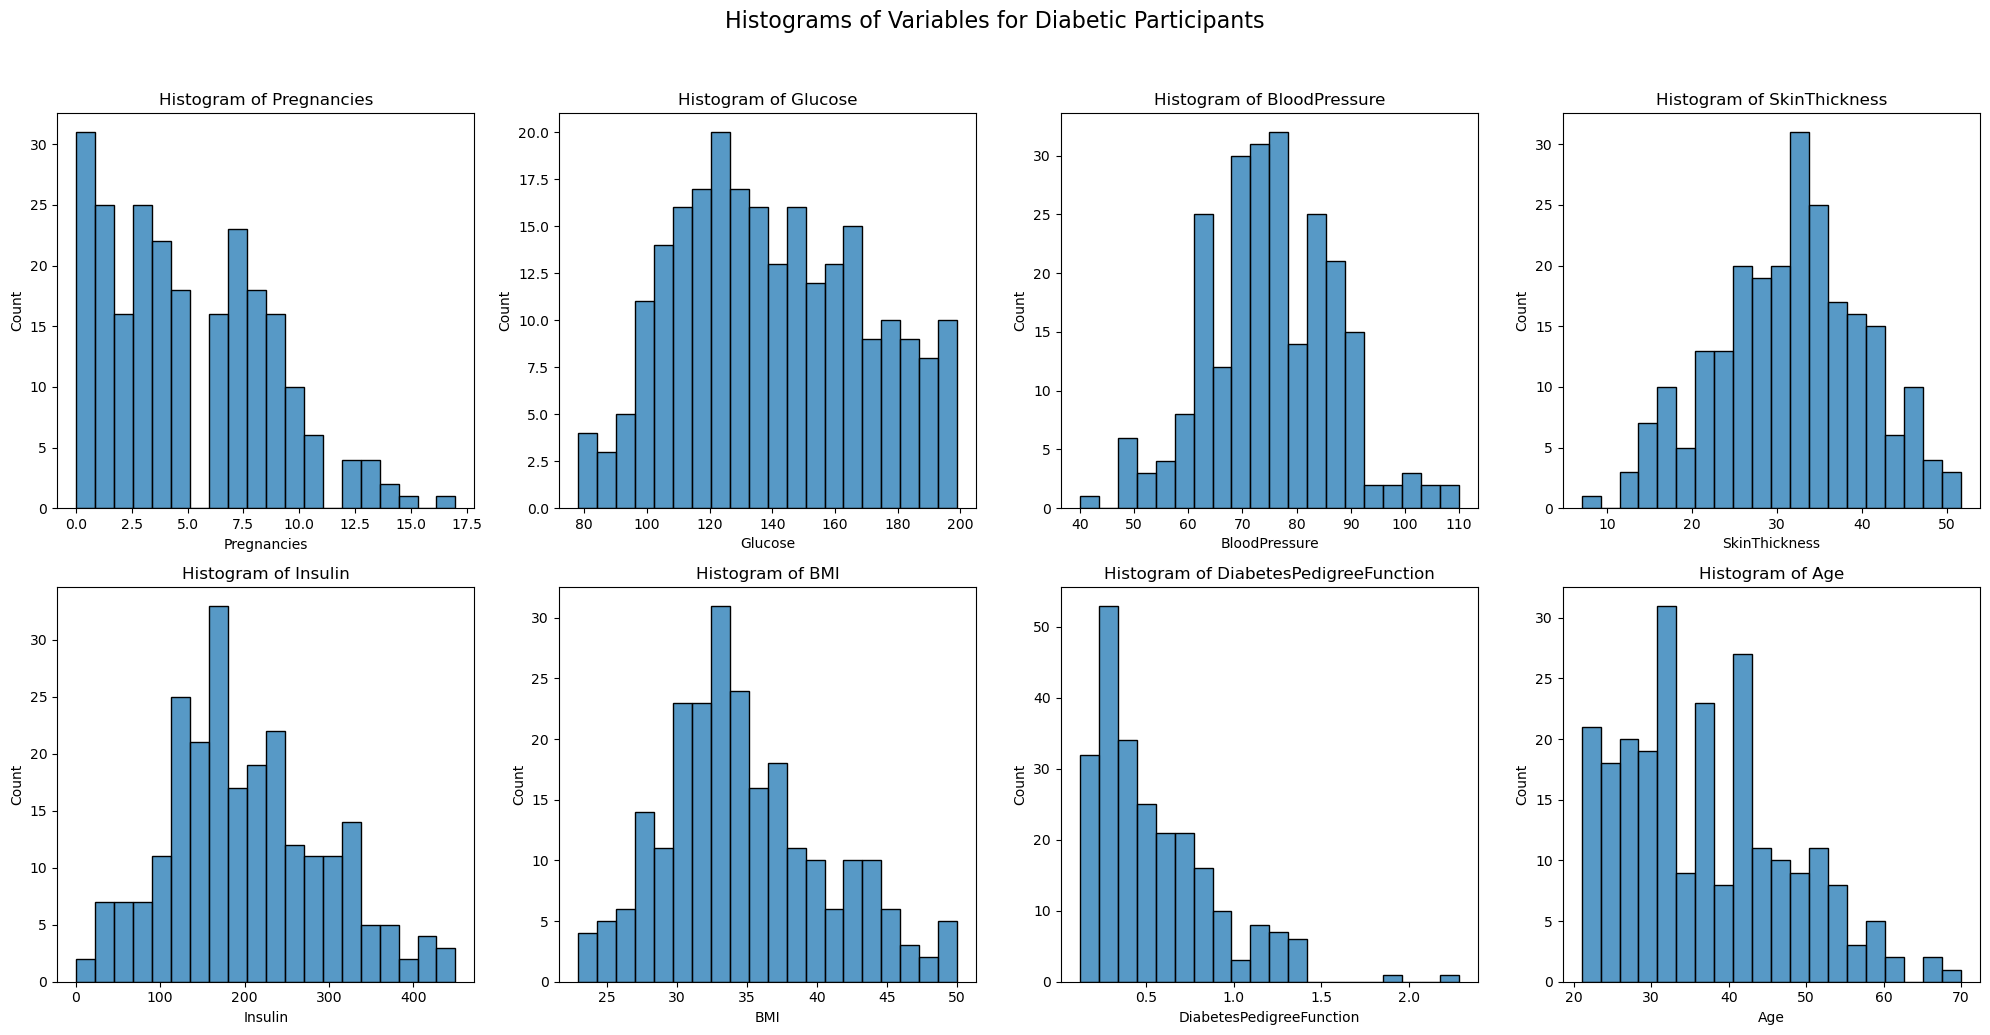

In [221]:
df_outcome_1 = df[df['Outcome'] == 1]

columns = df_outcome_1.columns.drop('Outcome')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

fig.suptitle('Histograms of Variables for Diabetic Participants', fontsize=16, y=1.03)

axes = axes.flatten()

# Loop through the variables and create a histogram for each
for i, column in enumerate(columns):
    sns.histplot(df_outcome_1[column], ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

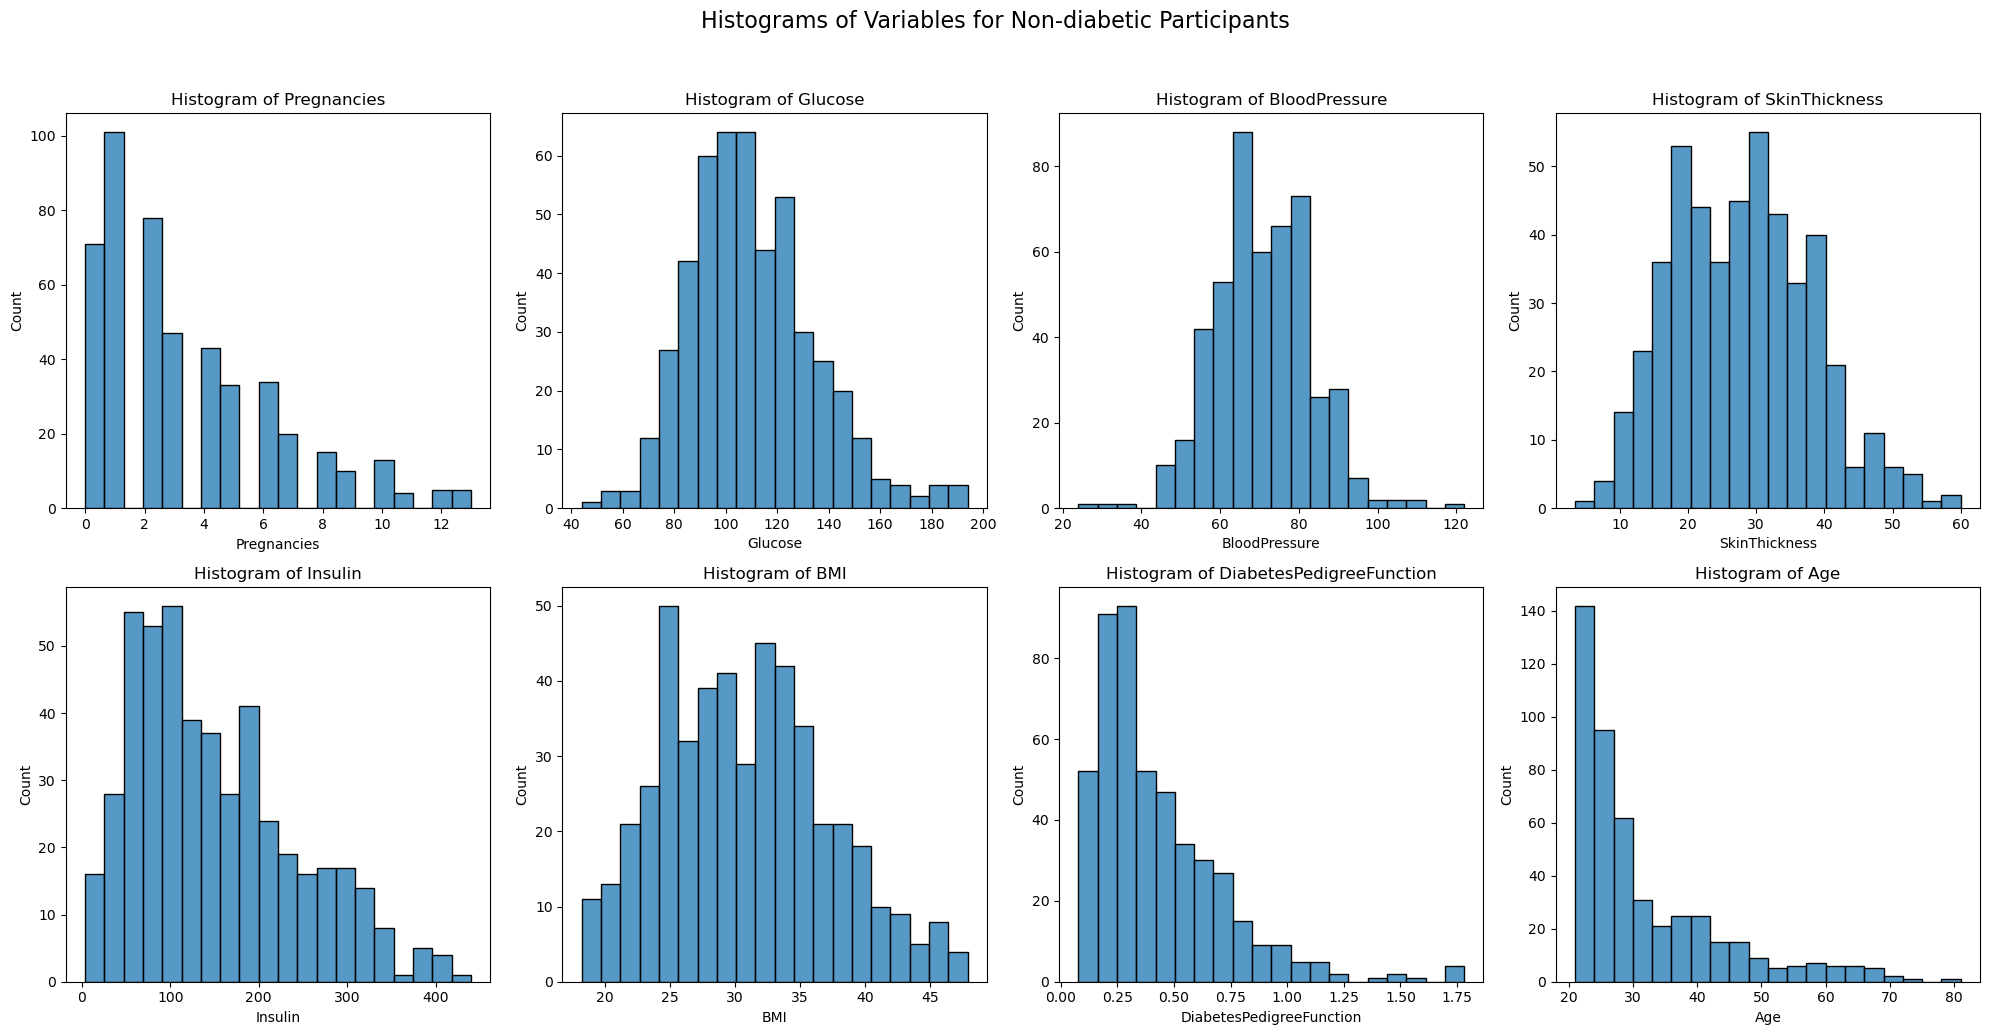

In [222]:
df_outcome_0 = df[df['Outcome'] == 0]

columns = df_outcome_0.columns.drop('Outcome')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

fig.suptitle('Histograms of Variables for Non-diabetic Participants', fontsize=16, y=1.03)

axes = axes.flatten()

# Loop through the variables and create a histogram for each
for i, column in enumerate(columns):
    sns.histplot(df_outcome_0[column], ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Skin thickness has zeros and one apparent outlier. Double check outlier is outside 1.5 x IQR

In [223]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.861925,119.901060,72.198983,29.191568,167.245205,32.112552,0.466286,33.048815,0.331939
std,3.369542,29.643463,12.110211,9.885523,94.848625,6.446138,0.313447,11.573019,0.471238
min,0.000000,44.000000,24.000000,3.402856,0.212764,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,92.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.361741,155.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,36.000000,231.000000,36.100000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,449.904998,50.000000,2.288000,81.000000,1.000000


In [224]:
#average Glucose level for people with diabetes
gluc_mean_1 = df[df['Outcome'] == 1]['Glucose'].mean()
#average Glucose level for people without diabetes
gluc_mean_0 = df[df['Outcome'] == 0]['Glucose'].mean()

#average BMI for people with diabetes
bmi_mean_1 = df[df['Outcome'] == 1]['BMI'].mean()
#average BMI for people without diabetes
bmi_mean_0 = df[df['Outcome'] == 0]['BMI'].mean()

print('Average Glucose level for people with diabetes: ', gluc_mean_1)
print('Average Glucose level for people without diabetes: ', gluc_mean_0)
print('Average BMI for people with diabetes: ', bmi_mean_1)
print('Average BMI for people without diabetes: ', bmi_mean_0)



Average Glucose level for people with diabetes:  139.90265304155886
Average Glucose level for people without diabetes:  109.96289836324371
Average BMI for people with diabetes:  34.817647058823525
Average BMI for people without diabetes:  30.76847599164927


- Are there any missing values in the dataset?
    - The missing values were not null values but zeros. 
    - Zeros were replaced with the corrected mean (mean without zeros included) if the count of zeros was low
    - if the count of zeros were high, the zeros were replaced with a normal distribution based on the corrected mean and std
    - the above was only done for normally distributed variables (ie not Age, DiabetesPedigreeFunction or Pregnancies)
- How are the predictor variables related to the outcome variable?
    - Looking at the barplots, every variable with a higher value results in a higher count of positive diabetes values. 
- What is the correlation between the predictor variables?
    - Looking at the pairplot, there are no obvious correlations, however, skinthickness and BMI looks to have a positive correlation
- What is the distribution of each predictor variable?
    - the distribution of BMI, SkinThickness, Glucose, BloodPressure appear to be normally distributed. 
    - Insulin appears to be a bell curve truncated as it approaches zero so is not a true normal distribution
- Are there any outliers in the predictor variables?
    - outliers in BMI, Insulin, and SkinThickness were identified using 1.5*IQR and removed. 
- How are the predictor variables related to each other?
    - answered above re correlation
- Is there any interaction effect between the predictor variables?
    - never heard this term before
- What is the average age of the individuals in the dataset?
    - 33
- What is the average glucose level for individuals with diabetes and without diabetes?
    - Average Glucose level for people with diabetes:  141.30465679762204
    - Average Glucose level for people without diabetes:  110.01655398563605
- What is the average BMI for individuals with diabetes and without diabetes?
    - Average BMI for people with diabetes:  35.01959183673469
    - Average BMI for people without diabetes:  30.81129363449692
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
    - for diabetic participants, the most notable changes in the distribution are for Insulin and glucose, where there is a larger number of high glucose samples in the diabetic samples, while insulin has a left skewed distribution with more lower insulin samples
- Are there any differences in the predictor variables between males and females (if gender information is available)?
    - there is no gender information other than looking at pregnancies > 0 (this still exludes women who have not had a pregnancy so is not a good measure for gender information)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

- Missing values and outliers already corrected in previous section

In [242]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Using Standard Scaler due to time constraints. Otherwise would run two models, one with MinMax and one with Standard and compare the results. 

Standard scaler chosen over minmax as there are variables with skewed distributions and all variables have different units and ranges. 

In [243]:
#create insuling to glucose ratio
df['Insulin_Glucose_Ratio'] = df['Insulin'] / df['Glucose']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_DPF,Insulin_Glucose_Ratio
0,6,148.0,72.0,35.000000,263.158077,33.6,0.627,50,1,31.350,1.778095
1,1,85.0,66.0,29.000000,312.922069,26.6,0.351,31,0,10.881,3.681436
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,3.507,1.056180
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,75.504,1.226277
5,5,116.0,74.0,34.227961,90.116930,25.6,0.201,30,0,6.030,0.776870


<Axes: xlabel='Outcome', ylabel='Insulin_Glucose_Ratio'>

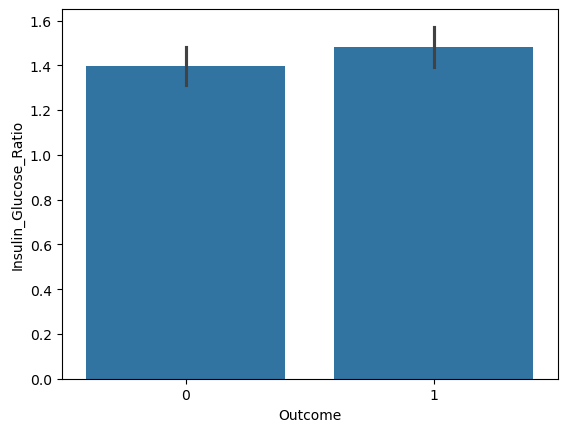

In [244]:
sns.barplot(x=df['Outcome'], y='Insulin_Glucose_Ratio', data=df)

Will drop the insulin glucose ratio as the conifdence intervals overlap

In [245]:
df.drop('Insulin_Glucose_Ratio', axis=1, inplace=True)

In [246]:
#multiple age by DiabetesPedigreeFunction and check relation to diabetes
df['Age_DPF'] = df['Age'] * df['DiabetesPedigreeFunction']

<Axes: xlabel='Outcome', ylabel='Age_DPF'>

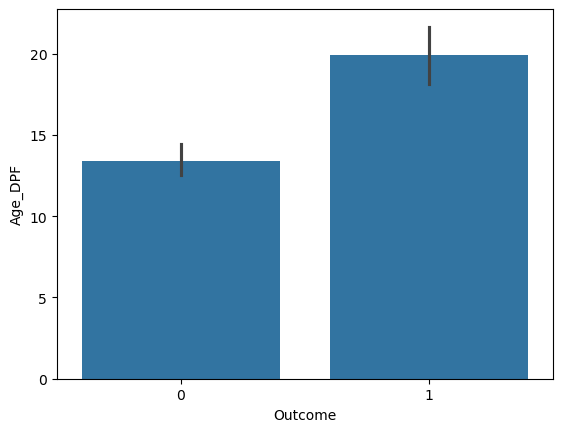

In [247]:
sns.barplot(x=df['Outcome'], y='Age_DPF', data=df)

Seems to be significant so can leave in. Continue with scaling

In [248]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

scaled_df = pd.DataFrame(scaled, columns=df.columns[:-1])

scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.634973,0.948558,-0.016443,0.587980,1.011926,0.230911,0.513088,1.465738,1.261002
1,-0.849944,-1.178183,-0.512238,-0.019392,1.536960,-0.855768,-0.368057,-0.177157,-0.374888
2,-0.849944,-1.043152,-0.512238,-0.626764,-0.772772,-0.622908,-0.955487,-1.041839,-0.964221
3,-1.146928,0.577223,-2.660685,0.587980,0.007963,1.705691,5.815921,-0.004221,4.789807
4,0.337989,-0.131691,0.148823,0.509827,-0.813740,-1.011008,-0.846940,-0.263625,-0.762582


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

- Will use SVM and XGBoost as the non-ensemble and ensemble model respectively

In [249]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_recall_curve, recall_score, precision_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['Outcome'], test_size=0.2, random_state=42)

In [250]:
clf = svm.SVC(kernel='poly', )

clf.fit(X_train, y_train)

SVC(kernel='poly')

In [251]:
y_pred = clf.predict(X_test)

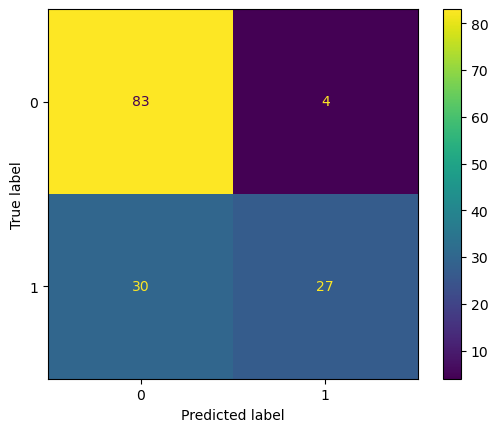

In [252]:
cm = confusion_matrix(y_test, y_pred)

display_clf = ConfusionMatrixDisplay(confusion_matrix=cm)
display_clf.plot()

In [253]:
accuracy_clf = accuracy_score(y_test, y_pred)
recall_score_clf = recall_score(y_test, y_pred)
f1_score_clf = f1_score(y_test, y_pred)
print("Accuracy of SVM: %.2f%%" % (accuracy_clf * 100.0))
print("Recall of SVM: %.2f%%" % (recall_score_clf * 100.0))
print("F1 Score of SVM: %.2f%%" % (f1_score_clf * 100.0))

Accuracy of SVM: 76.39%
Recall of SVM: 47.37%
F1 Score of SVM: 61.36%


In [254]:
#XGBoost
dtrain_reg = xgb.DMatrix(X_train, label=y_train)
dtest_reg = xgb.DMatrix(X_test, label=y_test)

In [255]:
xgb_clf = XGBClassifier()

In [256]:
model_xgb = xgb_clf.fit(X_train, y_train)

In [257]:
y_pred_xgb = model_xgb.predict(X_test)

y_pred_xgb

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [258]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_score_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost: %.2f%%" % (accuracy_xgb * 100.0))
print("Recall of XGBoost: %.2f%%" % (recall_score_xgb * 100.0))
print("F1 Score of XGBoost: %.2f%%" % (f1_score_xgb * 100.0))

Accuracy of XGBoost: 71.53%
Recall of XGBoost: 57.89%
F1 Score of XGBoost: 61.68%


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- dataset does not have a normal distribution of ages which could improve the data set
- The data collection process should be questioned as there were a high number of rows with zeros for variables that should not tend to zero
- Although the accuracy of the SVM model was higher, we are more concerned with the false negative rate, where a patient may get labeled as not having diabetes when they in fact have it.
- As a result of that the, XGBoost model would be chosen due to it's higher recall, which takes into account the false negative rate. 

- Next steps would be to use hyperparameter tuning (eg. gridsearch). Only default parameters were used